<a href="https://colab.research.google.com/github/JairusTheAnalyst/JairusTheAnalyst/blob/main/Mini_Project_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

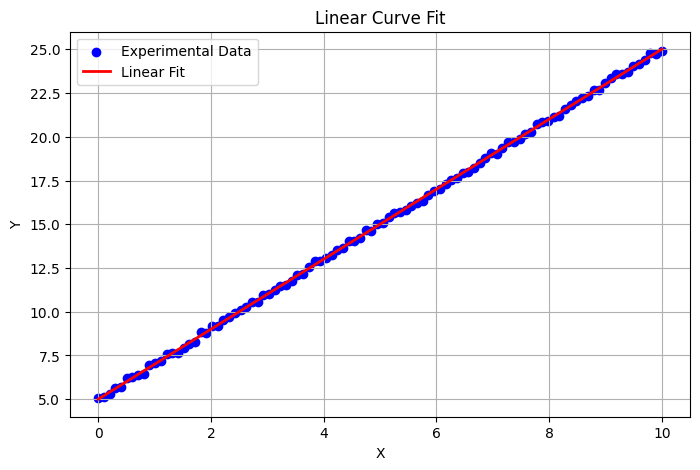


--- Linear Fit ---
Fitted Parameters: [2.0010894  4.99779272]
Root Mean Squared Error (RMSE): 0.1008
R-squared: 0.9997


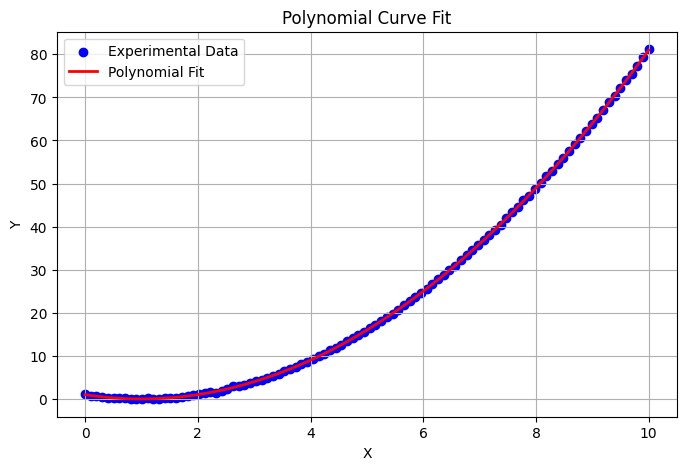


--- Polynomial Fit ---
Fitted Parameters: [ 1.00001925 -1.99911619  0.99195389]
Root Mean Squared Error (RMSE): 0.0979
R-squared: 1.0000


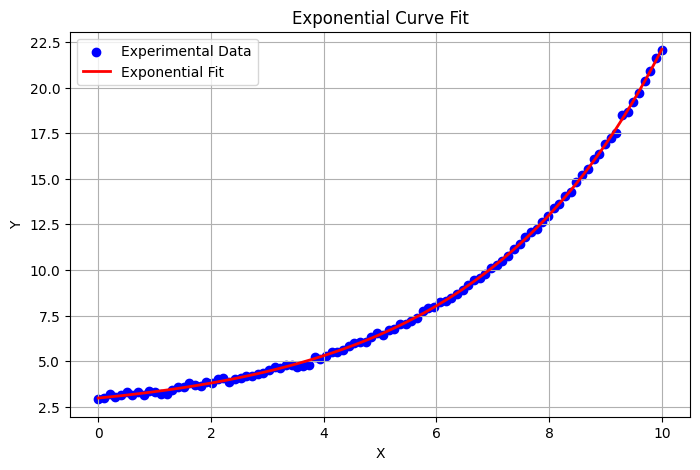


--- Exponential Fit ---
Fitted Parameters: [0.99961691 0.30025125 1.97588063]
Root Mean Squared Error (RMSE): 0.0983
R-squared: 0.9996


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import mean_squared_error

# --- Curve Definitions ---

# Linear model: y = ax + b
def linear(x, a, b):
    return a * x + b

# Polynomial model (2nd degree): y = ax^2 + bx + c
def polynomial(x, a, b, c):
    return a * x**2 + b * x + c

# Exponential model: y = a * exp(bx) + c
def exponential(x, a, b, c):
    return a * np.exp(b * x) + c

# --- Data Generation ---

def generate_data(func, params, x_range):
    x = np.linspace(*x_range, 100)
    y = func(x, *params)
    noise = np.random.normal(0, 0.1, size=y.shape)
    y_noisy = y + noise
    return x, y_noisy

# --- Model Fitting ---

def fit_curve(x, y, model_type):
    if model_type == 'linear':
        popt, _ = curve_fit(linear, x, y)
        fitted_curve = linear(x, *popt)
    elif model_type == 'polynomial':
        popt, _ = curve_fit(polynomial, x, y)
        fitted_curve = polynomial(x, *popt)
    elif model_type == 'exponential':
        popt, _ = curve_fit(exponential, x, y, maxfev=10000)
        fitted_curve = exponential(x, *popt)
    else:
        raise ValueError("Unsupported model type. Choose 'linear', 'polynomial', or 'exponential'.")

    return popt, fitted_curve

# --- Residual Analysis ---

def analyze_residuals(y, fitted_curve):
    residuals = y - fitted_curve
    rmse = np.sqrt(mean_squared_error(y, fitted_curve))
    return residuals, rmse

def calculate_r_squared(y, fitted_curve):
    ss_res = np.sum((y - fitted_curve)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r_squared = 1 - (ss_res / ss_tot)
    return r_squared

# --- Main Function ---

def fit_and_analyze(x_range=(0, 10), model_type='linear'):
    # Select true parameters for each model
    if model_type == 'linear':
        true_func, true_params = linear, (2, 5)
    elif model_type == 'polynomial':
        true_func, true_params = polynomial, (1, -2, 1)
    elif model_type == 'exponential':
        true_func, true_params = exponential, (1, 0.3, 2)
    else:
        raise ValueError("Invalid model_type")

    # Generate synthetic data
    x, y = generate_data(true_func, true_params, x_range)

    # Fit the curve
    popt, fitted_curve = fit_curve(x, y, model_type)

    # Analyze residuals and goodness of fit
    residuals, rmse = analyze_residuals(y, fitted_curve)
    r_squared = calculate_r_squared(y, fitted_curve)

    # Plot the fit
    plt.figure(figsize=(8, 5))
    plt.scatter(x, y, color='blue', label='Experimental Data')
    plt.plot(x, fitted_curve, color='red', linewidth=2, label=f'{model_type.capitalize()} Fit')
    plt.title(f'{model_type.capitalize()} Curve Fit')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Print metrics
    print(f"\n--- {model_type.capitalize()} Fit ---")
    print(f"Fitted Parameters: {popt}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared: {r_squared:.4f}")

# --- Run for all models ---

if __name__ == "__main__":
    fit_and_analyze(model_type='linear')
    fit_and_analyze(model_type='polynomial')
    fit_and_analyze(model_type='exponential')
